# Описание проекта

Мы аналитики компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

# Подготовительные действия

In [1]:
# импортируем необходимые библиотеки
from IPython.display import display
import pandas as pd

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore") 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Проверим-типы-на-корректность" data-toc-modified-id="Проверим-типы-на-корректность-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Проверим типы на корректность</a></span></li><li><span><a href="#Выберем-топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Выберем-топ-10-городов-по-количеству-рейсов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выберем топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Построим-графики" data-toc-modified-id="Построим-графики-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построим графики</a></span><ul class="toc-item"><li><span><a href="#Тип-воздушного-судна-и-количество-рейсов" data-toc-modified-id="Тип-воздушного-судна-и-количество-рейсов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Тип воздушного судна и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

In [2]:
# загружаем данные
planes_data = pd.read_csv('datasets/query_1.csv')
flights_data = pd.read_csv('datasets/query_3.csv')

#
display(
    planes_data.head()
)

display(
    flights_data.head()
)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [3]:
# изучаем общую информацию
display(planes_data.info(memory_usage='deep'))

# смотрим на столбец с числовыми данными
display(planes_data.describe().T)

# смотрим на уникальные значения столбца со строковыми данными
display(planes_data['model'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 775.0 bytes


None

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


Airbus A321-200        1
Airbus A319-100        1
Bombardier CRJ-200     1
Sukhoi SuperJet-100    1
Boeing 737-300         1
Boeing 777-300         1
Boeing 767-300         1
Cessna 208 Caravan     1
Name: model, dtype: int64

In [4]:
# изучаем общую информацию
display(flights_data.info(memory_usage='deep'))

# смотрим на столбец с числовыми данными
display(flights_data.describe().T)

# смотрим на уникальные значения столбца со строковыми данными
display(flights_data['city'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.7 KB


None

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


Сыктывкар         1
Ростов-на-Дону    1
Самара            1
Иркутск           1
Белгород          1
                 ..
Тюмень            1
Ноябрьск          1
Новокузнецк       1
Новосибирск       1
Орск              1
Name: city, Length: 101, dtype: int64

По результатам изучения данных мы можем сказать следующее про оба датасета:

- пропусков нет
- в каждом датасете 1 количественная и 1 качественная категория
- типы данных по количественным категориям избыточны для данных, которые в них хранятся

## Проверим типы на корректность

В целом типы данных корректны, но избыточны для столбцов, содержащих числовые данные. Приведём эти столбцы к более рациональным типам.

In [6]:
# приводим типы
planes_data['flights_amount'] = pd.to_numeric(planes_data['flights_amount'], downcast='unsigned')

# смотрим на результат
display(planes_data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null uint16
dtypes: object(1), uint16(1)
memory usage: 727.0 bytes


None

In [7]:
# приводим типы
flights_data['average_flights'] = pd.to_numeric(flights_data['average_flights'], downcast='float')

# смотрим на результат
display(flights_data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float32
dtypes: float32(1), object(1)
memory usage: 10.3 KB


None

Даже для таких скромных выборок нам удалось сэкономить немного памяти за счёт рационального выбора типов: 6,19% для датасета `planes_data`, и 3,74% для датасета `flights_data`.

## Выберем топ-10 городов по количеству рейсов

In [8]:
# сохраним выборку топ-10 в отдельной переменной на будущее
top_10_cities = flights_data.sort_values(by='average_flights', ascending=False).head(10)

# посмотрим на наш топ
display(
    top_10_cities.reset_index()
)

,index,city,average_flights
0,43,Москва,129.774200
1,70,Санкт-Петербург,31.161291
2,54,Новосибирск,17.322580
3,33,Красноярск,11.580646
4,20,Екатеринбург,11.322580
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612904
9,84,Ульяновск,9.580646


## Построим графики

### Тип воздушного судна и количество рейсов

Text(0, 0.5, 'Кол-во выполненных рейсов')

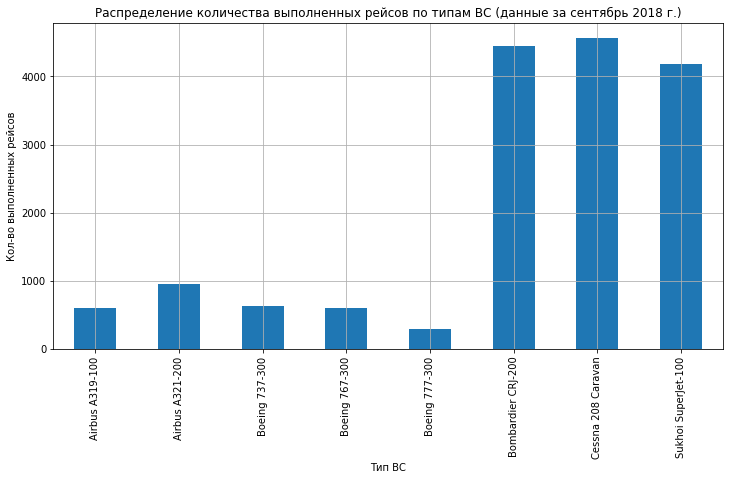

In [8]:
ax = planes_data.plot.bar(x='model',
                      y='flights_amount',            
                      figsize=(12,6),
                      title='Распределение количества выполненных рейсов по типам ВС (данные за сентябрь 2018 г.)',
                      grid=True,
                      legend=False)
ax.set_xlabel('Тип ВС')
ax.set_ylabel('Кол-во выполненных рейсов')

Исходя из данного графика можно сделать вывод, что основными тружениками в нашей компании являются региональные (ближнемагистральные и МВЛ) ВС - CRJ-200, 208 Caravan и SSJ-100. Попробуем изучить это распределение подробнее - добавим в таблицу данные о производителе и категории ВС по дальности полёта, а также посчитаем долю в общем количестве выполненных рейсов для каждого типа ВС.

In [9]:
# добавляем столбец с долей выполненных рейсов
planes_data['share'] = round(planes_data['flights_amount'] / planes_data['flights_amount'].sum() * 100, 2)

# пишем функцию для определения категории ВС по дальности полёта
def add_plane_type(row):
    model = row['model']
    if '777-300' in model:
        return 'long-range'
    if ('Boeing' in model) or ('Airbus' in model):
        return 'mid-range'
    return 'regional'

# добавляем данные о категории по дальности
planes_data['type'] = planes_data.apply(add_plane_type, axis=1)

# пишем функцию для определения производителя ВС
def add_plane_mfr(row):
    model = row['model']
    return str(model).split()[0]

# добавляем данные
planes_data['manufacturer'] = planes_data.apply(add_plane_mfr, axis=1)

# посмотрим на сводную таблицу с учётом дополнительных данных
display(planes_data.pivot_table(index=['type', 'manufacturer', 'model']).sort_values(by='share', ascending=False))

flights_amount  share
type       manufacturer model                                     
regional   Cessna       Cessna 208 Caravan             4557  27.98
           Bombardier   Bombardier CRJ-200             4446  27.30
           Sukhoi       Sukhoi SuperJet-100            4185  25.70
mid-range  Airbus       Airbus A321-200                 960   5.89
           Boeing       Boeing 737-300                  630   3.87
           Airbus       Airbus A319-100                 607   3.73
           Boeing       Boeing 767-300                  600   3.68
long-range Boeing       Boeing 777-300                  300   1.84

,manufacturer,share
0,Cessna,27.98
1,Bombardier,27.30
2,Sukhoi,25.70
3,Airbus,9.62
4,Boeing,9.39


Text(0, 0.5, 'Доля выполненных рейсов')

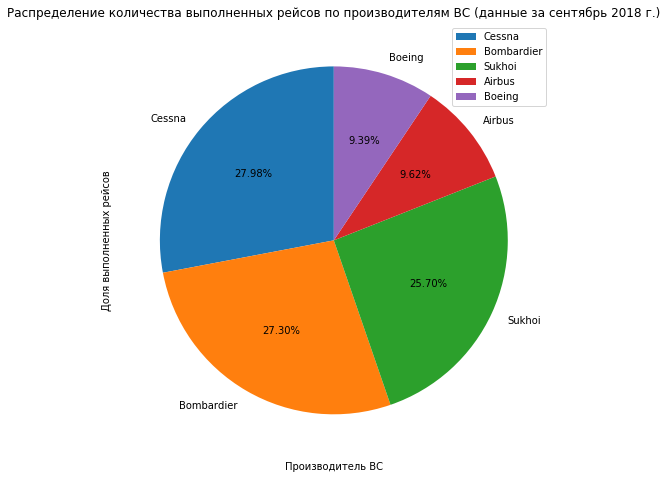

In [10]:
# сохраняем сводную таблицу с производителями и их долей
_data = planes_data.pivot_table(index='manufacturer', aggfunc={'share':'sum'}).sort_values(by='share', ascending=False).reset_index()

# выводим сводную таблицу
display(_data)

# рисуем круговую диаграмму для наглядности
ax = _data.plot.pie(labels=_data['manufacturer'],
                    y='share',            
                    figsize=(8,8),
                    title='Распределение количества выполненных рейсов по производителям ВС (данные за сентябрь 2018 г.)',              
                    legend=True,
                    autopct='%1.2f%%',
                    startangle=90)
ax.set_xlabel('Производитель ВС')
ax.set_ylabel('Доля выполненных рейсов')

,type,share
0,regional,80.98
1,mid-range,17.17
2,long-range,1.84


Text(0, 0.5, 'Доля выполненных рейсов')

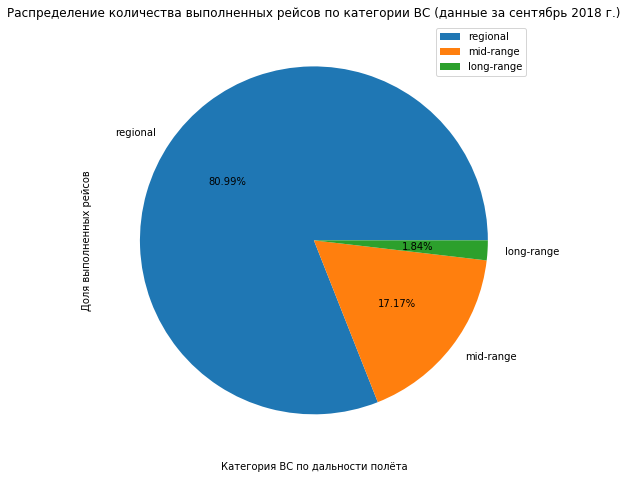

In [11]:
# сохраняем сводную таблицу с категориями дальности ВС и их долей
_data = planes_data.pivot_table(index='type', aggfunc={'share':'sum'}).sort_values(by='share', ascending=False).reset_index()

# выводим сводную таблицу
display(_data)

# рисуем круговую диаграмму для наглядности
ax = _data.plot.pie(labels=_data['type'],
                    y='share',            
                    figsize=(8,8),
                    title='Распределение количества выполненных рейсов по категории ВС (данные за сентябрь 2018 г.)',              
                    legend=True,
                    autopct='%1.2f%%',
                    startangle=0)
ax.set_xlabel('Категория ВС по дальности полёта')
ax.set_ylabel('Доля выполненных рейсов')

Доля количества рейсов у региональных ВС совсем уж запредельная - 81%! Если исходить только из этих графиков, может сложиться мнение, что наша компания чисто региональная. Но мы помним, что в наших данных у нас только количество рейсов для каждого типа ВС, не более. Эти данные могут быть полезны только технической службе, т.к. помогут правильно составить бюджет и скорректировать закупки ЗИП для соответствующих типов ВС. 
Если мы хотим из этих данных понять что-то про деньги, то нам нужно эти рейсы конвертировать в пассажиропоток. Для этого возьмём из открытых источников пассажировместимость для каждого типа ВС и перемножим её на количество рейсов. Мы сделаем условное допущение, что в этот период все ВС летали со 100% загрузкой и имеют типовую компоновку. Добавим для каждого типа ВС его пассажировместимость, общее число перевезённых пассажиров и долю числа пассажиров от всех перевезённых за этот период.

,model,total_pass
0,Sukhoi SuperJet-100,410130
1,Bombardier CRJ-200,222300
2,Airbus A321-200,211200
3,Boeing 767-300,210000
4,Boeing 777-300,135300
5,Airbus A319-100,94692
6,Boeing 737-300,93870
7,Cessna 208 Caravan,59241


Text(0, 0.5, 'Кол-во перевезённых пассажиров')

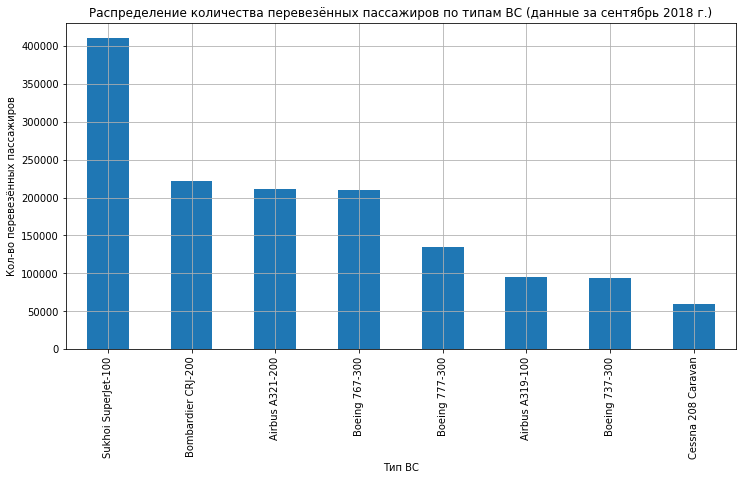

In [12]:
# пишем функцию для добавления пассажировместимости
def calc_pass_data(row):
    capacity = {
        'Sukhoi SuperJet-100':98,
        'Boeing 767-300':350,
        'Boeing 737-300':149,
        'Bombardier CRJ-200':50,
        'Boeing 777-300':451,
        'Cessna 208 Caravan':13,
        'Airbus A319-100':156,
        'Airbus A321-200':220
    }
    return capacity[row['model']]

# добавим столбец с пассажировместимостью
planes_data['capacity'] = planes_data.apply(calc_pass_data, axis=1)

# посчитаем общее число пассажиров, перевезённых данным типом ВС за указанный период
planes_data['total_pass'] = planes_data['flights_amount'] * planes_data['capacity']

# посчитаем долю от общего пассажиропотока
planes_data['total_pass_share'] = round(planes_data['total_pass'] / planes_data['total_pass'].sum() * 100)

# сохраним сводную таблицу с распределением числа пассажиров по типам ВС
_data = planes_data.pivot_table(index='model', aggfunc={'total_pass':'sum'}).sort_values(by='total_pass', ascending=False).reset_index()
display(_data)

# выведем график
ax = _data.plot.bar(x='model',
                      y='total_pass',            
                      figsize=(12,6),
                      title='Распределение количества перевезённых пассажиров по типам ВС (данные за сентябрь 2018 г.)',
                      grid=True,
                      legend=False)
ax.set_xlabel('Тип ВС')
ax.set_ylabel('Кол-во перевезённых пассажиров')

А вот и первые отличия. Оказывается, если считать не в рейсах, а в пассажирах (т.е. практически в деньгах), то картина немного иная. Cessna переезжает на последнее место, среднемагистральные лайнеры подтягиваются к лидерам, SSJ-100 перевозит почти в 2 раза больше пассажиров, чем CRJ-200, несмотря на практически идентичное количество рейсов. Посмотрим на распределение перевезённых пассажиров по производителям ВС.

,manufacturer,total_pass_share
0,Boeing,31.0
1,Sukhoi,29.0
2,Airbus,22.0
3,Bombardier,15.0
4,Cessna,4.0


Text(0, 0.5, 'Доля перевезённых пассажиров')

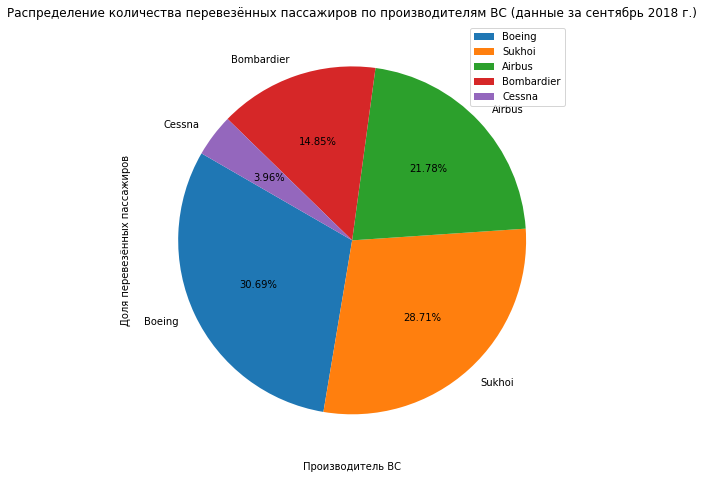

In [13]:
# сохраняем сводную таблицу с долями перевозок
_data = planes_data.pivot_table(index='manufacturer', aggfunc={'total_pass_share':'sum'}).sort_values(by='total_pass_share', ascending=False).reset_index()
display(_data)

# рисуем круговую диаграмму для наглядности
ax = _data.plot.pie(labels=_data['manufacturer'],
                    y='total_pass_share',            
                    figsize=(8,8),
                    title='Распределение количества перевезённых пассажиров по производителям ВС (данные за сентябрь 2018 г.)',              
                    legend=True,
                    autopct='%1.2f%%',
                    startangle=150)
ax.set_xlabel('Производитель ВС')
ax.set_ylabel('Доля перевезённых пассажиров')

По совокупному пассажиропотоку Boeing вырывается на первое место, обогнав Сухого. На третье подтянулся Airbus. А вот Cessna и Bombardier уже аутсайдеры. Посмотрим на распределение пассажиропотока по категориям дальности ВС.

,type,total_pass_share
0,regional,48.0
1,mid-range,44.0
2,long-range,9.0


Text(0, 0.5, 'Доля перевезённых пассажиров')

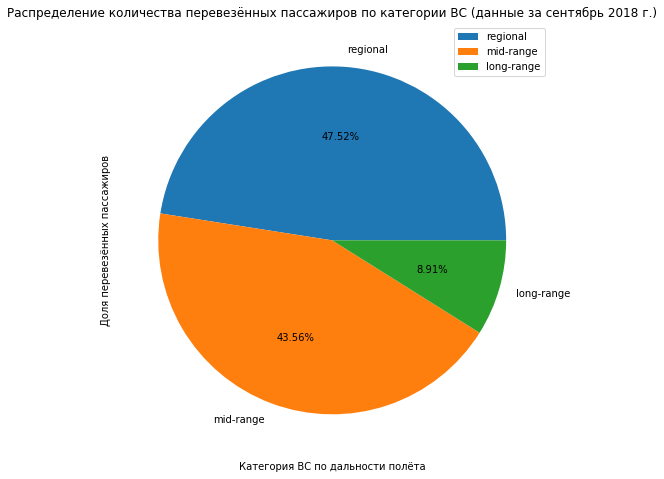

In [14]:
# сохраняем сводную таблицу с долями перевозок
_data = planes_data.pivot_table(index='type', aggfunc={'total_pass_share':'sum'}).sort_values(by='total_pass_share', ascending=False).reset_index()
display(_data)

# рисуем круговую диаграмму для наглядности
ax = _data.plot.pie(labels=_data['type'],
                    y='total_pass_share',            
                    figsize=(8,8),
                    title='Распределение количества перевезённых пассажиров по категории ВС (данные за сентябрь 2018 г.)',              
                    legend=True,
                    autopct='%1.2f%%',
                    startangle=0)
ax.set_xlabel('Категория ВС по дальности полёта')
ax.set_ylabel('Доля перевезённых пассажиров')

Смотря на этот график мы можем окончательно убедится, что при исследованиях авиаперевозок одного только количества рейсов недостаточно. Средне- и дальнемагистральные ВС теоретически суммарно перевезли чуть больше пассажиров, чем региональные ВС, при этом совершив суммарно 19% от всех выполненных рейсов.

Какие ещё выводы мы можем сделать по данному разделу?

- Cessna 208 Caravan совершила 28% всех рейсов, а перевезла при этом всего 4% общего пассажиропотока. Это наводит на мысль о том, что данный тип ВС не совсем подходит для выполнения текущих задач. Можно рекомендовать изучить направления, которые обслуживаются данным типом ВС и ответить на следующие вопросы
 - Могут ли аэропорты на этих направления принимать более крупные ВС?
 - Какова реальная загрузка ВС при выполнении рейса?
 
 Возможно, на некоторых направлениях удастся изменить расписание рейсов (сократить количество) и перейти на более вместительный тип ВС, за счёт чего снизить эксплуатационные расходы, или даже совсем вывести данный тип ВС из эксплуатации в нашей компании, что благоприятно скажется на стоимости обслуживания парка (чем шире номенклатура используемых ВС, тем выше стоимость обслуживания из-за необходимости содержания специфического штата и специфических запасов ЗИП).
 
- SSJ-100 фактически является флагманом нашей компании, как по числу рейсов (25,7%), так и по суммарному (теоретическому) пассажиропотоку (28,7%). 

- Среднемагистральные лайнеры обоих производителей (Boeing и Airbus) суммарно перевезли 43,56% теоретически возможного пассажиропотока, при этом совершили всего 17,7% от общего числа рейсов.

- Дальнемагистральные рейсы занимают довольно узкую нишу по выполненному числу рейсов (1,84%), но при этом перевезли 8,91% пассажиропотока (тут можно опустить слово "теоретического", т.к. ВС данной категории очень редко совершают рейсы с неполной загрузкой).

В общем и целом это говорит о том, что наша компания не является сугубо региональным перевозчиком, как можно было бы предположить глядя на распределение числа рейсов, а имеет довольно сбалансированный портфель обслуживаемых направлений.

### Города и количество рейсов

Text(0, 0.5, 'Среднее кол-во принятых рейсов')

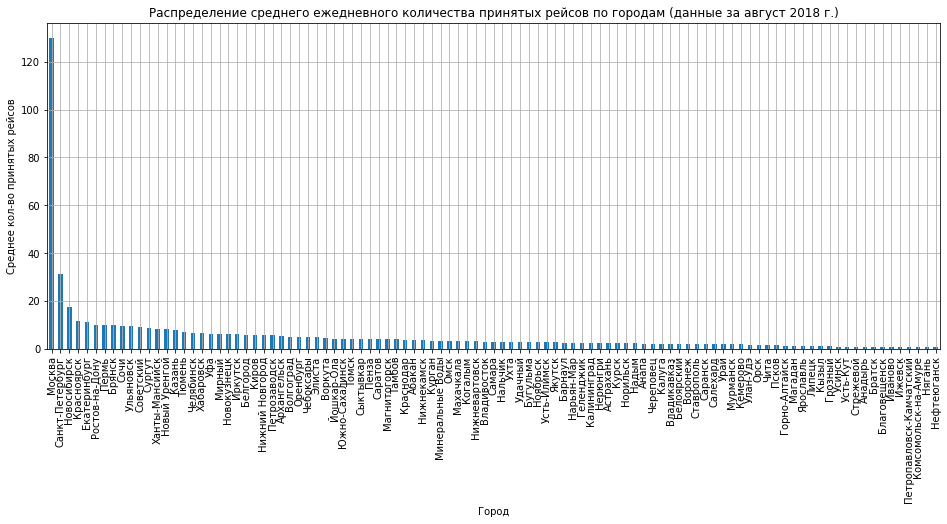

In [15]:
ax = flights_data.sort_values(by='average_flights', ascending=False).plot.bar(x='city',
                      y='average_flights',            
                      figsize=(16,6),
                      title='Распределение среднего ежедневного количества принятых рейсов по городам (данные за август 2018 г.)',
                      grid=True,
                      legend=False)
ax.set_xlabel('Город')
ax.set_ylabel('Среднее кол-во принятых рейсов')

Этот график подтверждает некоторые выводы, сделанные ранее - за август ВС из парка нашей компании принимались в 100 аэропортах. С невероятным отрывом по среднему количеству принятых рейсов лидирует Москва (130), затем, с понижением более чем в 4(!) раза идёт Санкт-Петербург (31.161291), замыкает тройку лидеров Новосибирск. с 4 по 100 место среднее количество рейсов неуклонно уменьшается, но не с таким градиентом, как у тройки лидеров.

### Топ-10 городов и количество рейсов

Text(0, 0.5, 'Среднее кол-во принятых рейсов')

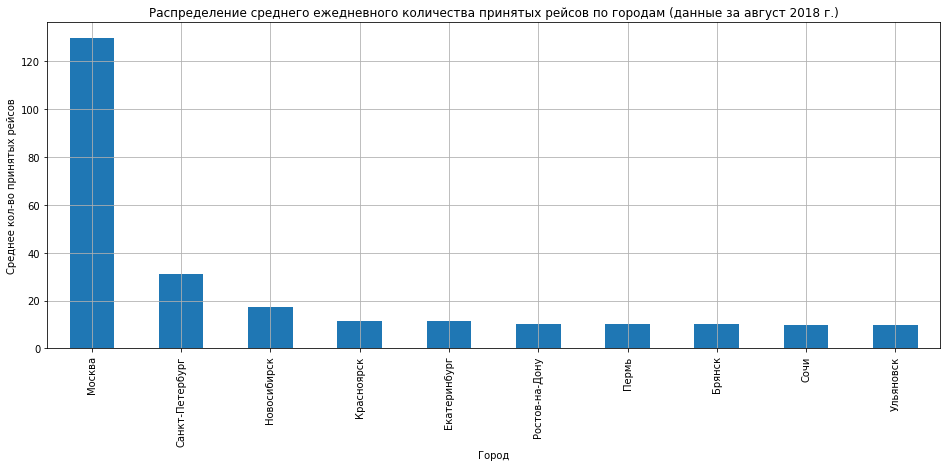

In [16]:
ax = flights_data.sort_values(by='average_flights', ascending=False).head(10).plot.bar(x='city',
                      y='average_flights',            
                      figsize=(16,6),
                      title='Распределение среднего ежедневного количества принятых рейсов по городам (данные за август 2018 г.)',
                      grid=True,
                      legend=False)
ax.set_xlabel('Город')
ax.set_ylabel('Среднее кол-во принятых рейсов')

Анализ этого графика лишь подтверждает сделанные нами выводы. Москва, Санкт-Петербург и Новосибирск являются явными лидерами по среднему количеству рейсов в день. Это вполне логично, т.к. после разрушения системы ГВФ СССР, где практически в каждом крупном аэропорту имелись местные авиаотряды, в стране образовалось 3 основных транспортных хаба, через которые осуществляются рейсы - Москва, Санкт-Петербург и Новосибирск. Для нашей авиакомпании данное распределение говорит лишь о том, что в Москве, Санкт-Петербурге и Новосибирске имеет смысл организовать представительство и иметь технических специалистов для обслуживания ВС.

## Общий вывод

- Основные рабочие лошадки нашей компании это SSJ-100 и среднемагистральные лайнеры Boeing и Airbus
- Основные транспортные хабы нашей страны это Москва, Санкт-Петербург и Новосибирск. В этих городах имеет смысл организовать представительства и тех. службы на базе соответствующих аэропортов базирования
- Сделать вывод о влиянии фестивалей на количество рейсов в данных условиях невозможно, т.к. мы не сравниваем все месяцы без фестивалей с месяцами с фестивалями. К тому же, помимо фестивалей, присутствует стандартная сезонность - в августе месяце студенты возвращаются из родных мест к местам учёбы